In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

from acquire import get_iris_data, get_titanic_data

import explore
%matplotlib inline

     measurement_id  sepal_length  sepal_width  petal_length  petal_width  \
0                 1           5.1          3.5           1.4          0.2   
1                 2           4.9          3.0           1.4          0.2   
2                 3           4.7          3.2           1.3          0.2   
3                 4           4.6          3.1           1.5          0.2   
4                 5           5.0          3.6           1.4          0.2   
5                 6           5.4          3.9           1.7          0.4   
6                 7           4.6          3.4           1.4          0.3   
7                 8           5.0          3.4           1.5          0.2   
8                 9           4.4          2.9           1.4          0.2   
9                10           4.9          3.1           1.5          0.1   
10               11           5.4          3.7           1.5          0.2   
11               12           4.8          3.4           1.6          0.2   

# Data Aquisition
## Question 1.
### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [3]:
iris = data('iris')
df = pd.DataFrame(iris)
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
list(df.columns)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 2
### Read the ``Table1_CustDetails`` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.
- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [8]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
df_excel = pd.read_csv(url, index_col="id")

In [9]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,monthly_charges,...,tenure_month,has_churned,has_phone,has_internet,has_internet_and_phone,partner_dependents,start_day,phone_type,internet_type,contract_type
id,,,,,,,,,,,,,,,,,,,,,
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,9.0,False,True,True,True,3,2020-05-03,One Line,DSL,1 Year
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,9.1,False,True,True,True,0,2020-05-03,Two or More Lines,DSL,Month-to-Month
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,3.8,True,True,True,True,0,2020-11-03,One Line,Fiber Optic,Month-to-Month
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,12.6,True,True,True,True,1,2020-02-03,One Line,Fiber Optic,Month-to-Month
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,3.2,True,True,True,True,1,2020-11-03,One Line,Fiber Optic,Month-to-Month
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,...,8.2,False,True,True,True,2,2020-06-03,One Line,DSL,Month-to-Month
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,...,72.1,False,True,True,True,1,2015-02-03,One Line,Fiber Optic,2 Year
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,...,63.5,False,True,True,True,1,2015-11-03,Two or More Lines,Fiber Optic,2 Year
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,...,7.1,False,True,True,True,0,2020-07-03,One Line,DSL,Month-to-Month


In [10]:
df_excel.shape

(7032, 22)

In [11]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   is_senior_citizen       7032 non-null   int64  
 3   partner                 7032 non-null   object 
 4   dependents              7032 non-null   object 
 5   phone_service           7032 non-null   int64  
 6   internet_service        7032 non-null   int64  
 7   contract_int            7032 non-null   int64  
 8   payment_type            7032 non-null   object 
 9   monthly_charges         7032 non-null   float64
 10  total_charges           7032 non-null   float64
 11  churn                   7032 non-null   object 
 12  tenure_month            7032 non-null   float64
 13  has_churned             7032 non-null   bool   
 14  has_phone               7032 non-null   

In [12]:
list(df_excel.columns[0:5])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [13]:
df_excel_types = df_excel.columns.where(df_excel.dtypes == object).to_series().groupby(df_excel.dtypes).groups
df_excel_types

{object: ['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn', 'start_day', 'phone_type', 'internet_type', 'contract_type']}

In [14]:
df_num_col = df_excel.columns.where((df_excel.dtypes == 'int64') | (df_excel.dtypes == 'float64')).dropna()
df_excel2 = df_excel[df_num_col]
df_excel2.apply(lambda x: x.max() - x.min())

is_senior_citizen        1.0
phone_service            2.0
internet_service         2.0
contract_int             2.0
monthly_charges        100.5
total_charges         8666.0
tenure_month            78.3
partner_dependents       3.0
dtype: float64

## Question 3
### Read the data from this google sheet into a dataframe, `df_google`.
- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables.
- print the unique values for each of your categorical variables

In [15]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

In [16]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
df_google.shape

(891, 12)

In [18]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [20]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df_google['Survived'].nunique()

2

In [22]:
df_google['Pclass'].nunique()

3

In [23]:
df_google['Sex'].nunique()

2

In [24]:
df_google['SibSp'].nunique()

7

In [25]:
df_google['Parch'].nunique()

7

In [26]:
df_google['Embarked'].nunique()

3

# Data Preparation

In [27]:
df_iris = get_iris_data()
df_iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
5,6,5.4,3.9,1.7,0.4,1,setosa
6,7,4.6,3.4,1.4,0.3,1,setosa
7,8,5.0,3.4,1.5,0.2,1,setosa
8,9,4.4,2.9,1.4,0.2,1,setosa
9,10,4.9,3.1,1.5,0.1,1,setosa


In [28]:
df = get_iris_data()
df_iris = df.drop(columns = ['species_id', 'measurement_id'])
df_iris.rename(columns={"species_name": "species"}, inplace = True)
df_dummy = pd.get_dummies(df_iris[['species']])

In [29]:
df

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
5,6,5.4,3.9,1.7,0.4,1,setosa
6,7,4.6,3.4,1.4,0.3,1,setosa
7,8,5.0,3.4,1.5,0.2,1,setosa
8,9,4.4,2.9,1.4,0.2,1,setosa
9,10,4.9,3.1,1.5,0.1,1,setosa


In [30]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [31]:
from prepare import prep_iris

In [32]:
prep_iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


# Data Exploration

In [33]:
df = prep_iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


In [34]:
#df.drop(columns = ['species'], inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [35]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [36]:
train, validate, test = train_validate_test_split(df, target='species')
train

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,0,1,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
133,6.3,2.8,5.1,1.5,virginica,0,0,1
95,5.7,3.0,4.2,1.2,versicolor,0,1,0
18,5.7,3.8,1.7,0.3,setosa,1,0,0
139,6.9,3.1,5.4,2.1,virginica,0,0,1
20,5.4,3.4,1.7,0.2,setosa,1,0,0
31,5.4,3.4,1.5,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
115,6.4,3.2,5.3,2.3,virginica,0,0,1


In [37]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [38]:
print(train.shape, validate.shape, test.shape)

(84, 8) (36, 8) (30, 8)


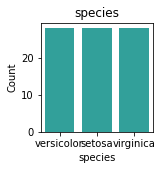

               species  Count  Percent
versicolor  versicolor     28    33.33
setosa          setosa     28    33.33
virginica    virginica     28    33.33
_________________________________________________________________


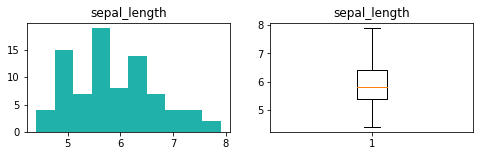

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


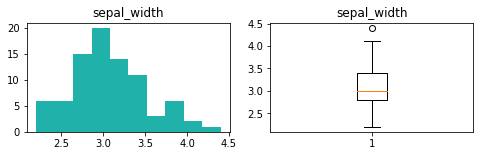

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


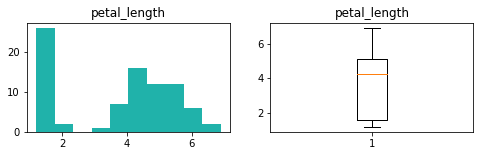

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


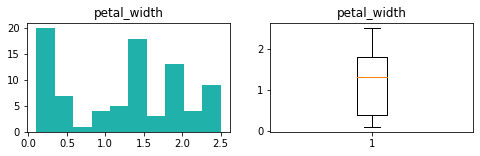

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [39]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width','petal_length','petal_width']

explore.explore_univariate(train, cat_vars, quant_vars)

### Bivariate

species_versicolor 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_setosa       0   1  All
species_versicolor             
0                   28  28   56
1                   28   0   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


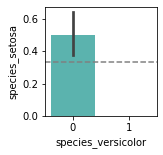


_____________________

species_virginica 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_setosa      0   1  All
species_virginica             
0                  28  28   56
1                  28   0   28
All                56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


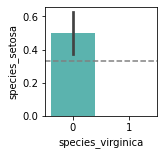


_____________________

sepal_length 
____________________



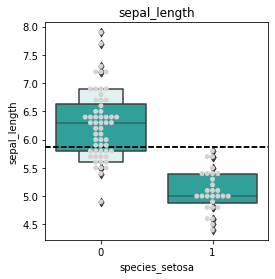

                count      mean       std  min    25%  50%    75%  max
species_setosa                                                        
0                56.0  6.260714  0.602624  4.9  5.800  6.3  6.625  7.9
1                28.0  5.089286  0.360390  4.4  4.875  5.0  5.400  5.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1511.5, pvalue=4.917738517892763e-12)

____________________

sepal_width 
____________________



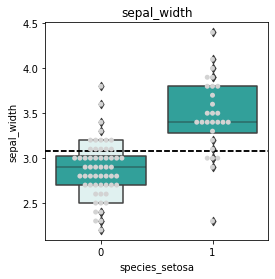

                count      mean       std  min    25%  50%    75%  max
species_setosa                                                        
0                56.0  2.878571  0.309083  2.2  2.700  2.9  3.025  3.8
1                28.0  3.467857  0.427788  2.3  3.275  3.4  3.800  4.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=187.0, pvalue=1.3354452213646879e-08)

____________________

petal_length 
____________________



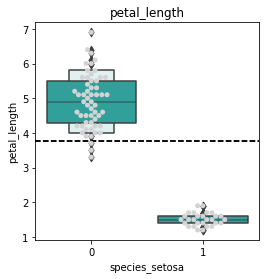

                count      mean       std  min    25%  50%  75%  max
species_setosa                                                      
0                56.0  4.903571  0.781366  3.3  4.275  4.9  5.5  6.9
1                28.0  1.507143  0.184448  1.2  1.400  1.5  1.6  1.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1568.0, pvalue=9.977154348539392e-14)

____________________

petal_width 
____________________



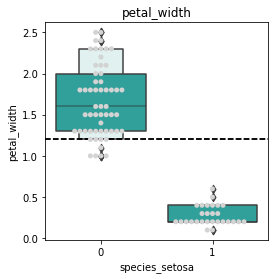

                count      mean       std  min  25%  50%  75%  max
species_setosa                                                    
0                56.0  1.667857  0.434891  1.0  1.3  1.6  2.0  2.5
1                28.0  0.275000  0.120570  0.1  0.2  0.2  0.4  0.6 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1568.0, pvalue=8.123961949952858e-14)

____________________



In [40]:
cat_vars = ['species_versicolor', 'species_virginica']

explore.explore_bivariate(train, 'species_setosa', cat_vars, quant_vars)

species_setosa 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_versicolor   0   1  All
species_setosa                 
0                   28  28   56
1                   28   0   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


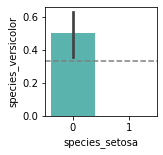


_____________________

species_virginica 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_versicolor   0   1  All
species_virginica              
0                   28  28   56
1                   28   0   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


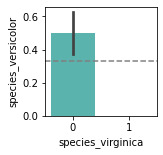


_____________________

sepal_length 
____________________



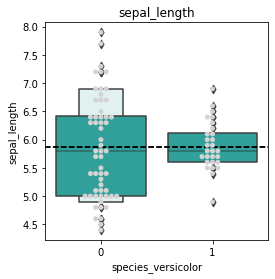

                    count      mean       std  min  25%  50%    75%  max
species_versicolor                                                      
0                    56.0  5.857143  0.896226  4.4  5.0  5.8  6.425  7.9
1                    28.0  5.896429  0.425556  4.9  5.6  5.8  6.125  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=732.0, pvalue=0.6245929694453309)

____________________

sepal_width 
____________________



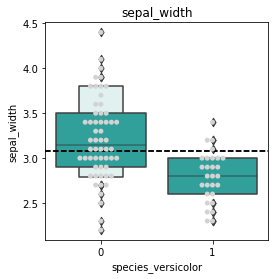

                    count      mean       std  min  25%   50%  75%  max
species_versicolor                                                     
0                    56.0  3.214286  0.453042  2.2  2.9  3.15  3.5  4.4
1                    28.0  2.796429  0.280848  2.3  2.6  2.80  3.0  3.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1226.5, pvalue=2.554781908375443e-05)

____________________

petal_length 
____________________



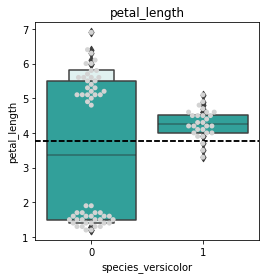

                    count      mean       std  min  25%   50%    75%  max
species_versicolor                                                       
0                    56.0  3.521429  2.066153  1.2  1.5  3.35  5.500  6.9
1                    28.0  4.271429  0.409930  3.3  4.0  4.25  4.525  5.1 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=776.5, pvalue=0.9469943086791007)

____________________

petal_width 
____________________



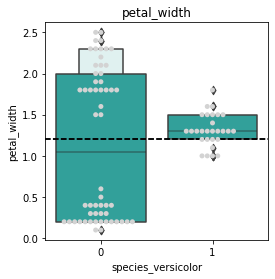

                    count      mean       std  min  25%   50%  75%  max
species_versicolor                                                     
0                    56.0  1.148214  0.908744  0.1  0.2  1.05  2.0  2.5
1                    28.0  1.314286  0.199470  1.0  1.2  1.30  1.5  1.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=767.0, pvalue=0.8750261808643868)

____________________



In [41]:
cat_vars = ['species_setosa', 'species_virginica']

explore.explore_bivariate(train, 'species_versicolor', cat_vars, quant_vars)

species_setosa 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 species_versicolor   0   1  All
species_setosa                 
0                   28  28   56
1                   28   0   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


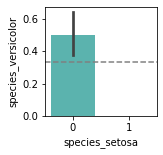


_____________________

species_versicolor 
_____________________

        chi2       p-value  degrees of freedom
0  79.560268  4.677377e-19                   1

observed:
 species_versicolor   0   1  All
species_versicolor             
0                   56   0   56
1                    0  28   28
All                 56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


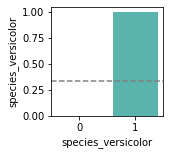


_____________________

sepal_length 
____________________



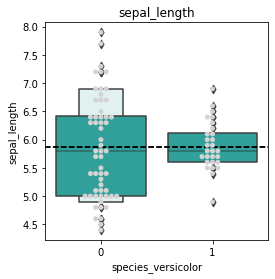

                    count      mean       std  min  25%  50%    75%  max
species_versicolor                                                      
0                    56.0  5.857143  0.896226  4.4  5.0  5.8  6.425  7.9
1                    28.0  5.896429  0.425556  4.9  5.6  5.8  6.125  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=732.0, pvalue=0.6245929694453309)

____________________

sepal_width 
____________________



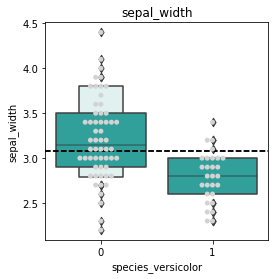

                    count      mean       std  min  25%   50%  75%  max
species_versicolor                                                     
0                    56.0  3.214286  0.453042  2.2  2.9  3.15  3.5  4.4
1                    28.0  2.796429  0.280848  2.3  2.6  2.80  3.0  3.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1226.5, pvalue=2.554781908375443e-05)

____________________

petal_length 
____________________



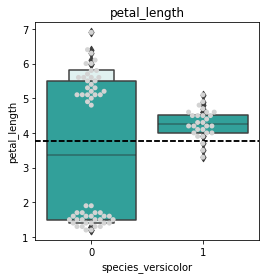

                    count      mean       std  min  25%   50%    75%  max
species_versicolor                                                       
0                    56.0  3.521429  2.066153  1.2  1.5  3.35  5.500  6.9
1                    28.0  4.271429  0.409930  3.3  4.0  4.25  4.525  5.1 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=776.5, pvalue=0.9469943086791007)

____________________

petal_width 
____________________



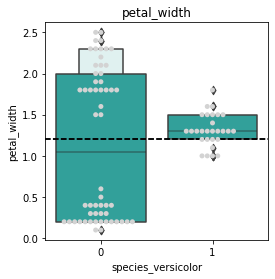

                    count      mean       std  min  25%   50%  75%  max
species_versicolor                                                     
0                    56.0  1.148214  0.908744  0.1  0.2  1.05  2.0  2.5
1                    28.0  1.314286  0.199470  1.0  1.2  1.30  1.5  1.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=767.0, pvalue=0.8750261808643868)

____________________



In [42]:
cat_vars = ['species_setosa', 'species_versicolor']

explore.explore_bivariate(train, 'species_versicolor', cat_vars, quant_vars)

### Takeaways
- Sepal width of Setosa seems to be higher than the average sepal width of other species
- Petal length of Setosa is much lower than other species

# Telco sandbox
#### Acquiring and Preparing the Data

In [43]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
telco = pd.read_csv(url, index_col="id") #Data acquired 
telco.head(5).T

id,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
is_senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
phone_service,1,2,1,1,1
internet_service,1,1,2,2,2
contract_int,1,0,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check
monthly_charges,65.6,59.9,73.9,98.0,83.9


In [44]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   is_senior_citizen       7032 non-null   int64  
 3   partner                 7032 non-null   object 
 4   dependents              7032 non-null   object 
 5   phone_service           7032 non-null   int64  
 6   internet_service        7032 non-null   int64  
 7   contract_int            7032 non-null   int64  
 8   payment_type            7032 non-null   object 
 9   monthly_charges         7032 non-null   float64
 10  total_charges           7032 non-null   float64
 11  churn                   7032 non-null   object 
 12  tenure_month            7032 non-null   float64
 13  has_churned             7032 non-null   bool   
 14  has_phone               7032 non-null   

In [45]:
telco.describe()

,is_senior_citizen,phone_service,internet_service,contract_int,monthly_charges,total_charges,tenure_month,partner_dependents
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,1.325085,1.223976,0.688851,64.790636,2283.409094,32.433831,1.080631
std,0.368844,0.642546,0.778958,0.832870,30.101932,2266.871139,24.578505,1.225719
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,35.500000,401.762500,8.800000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000,28.850000,1.000000
75%,0.000000,2.000000,2.000000,1.000000,89.900000,3794.737500,55.300000,2.000000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,79.300000,3.000000


In [46]:
telco.shape

(7032, 22)

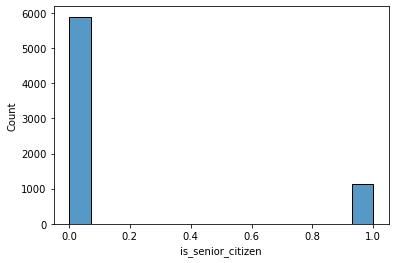

0    5890
1    1142
Name: is_senior_citizen, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


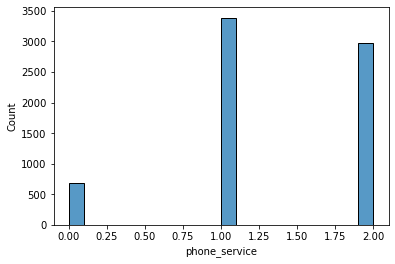

1    3386
2    2966
0     680
Name: phone_service, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


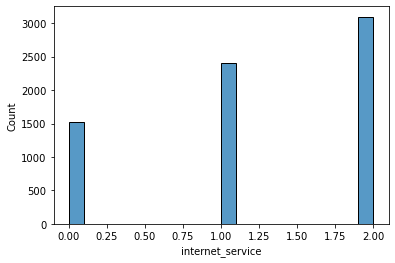

2    3097
1    2413
0    1522
Name: internet_service, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


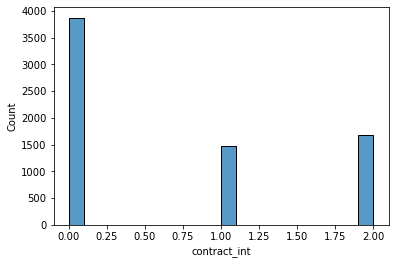

0    3873
2    1685
1    1474
Name: contract_int, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


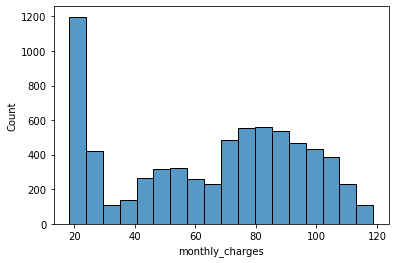

20.05     61
19.95     44
19.90     44
19.85     44
19.65     43
          ..
106.85     1
68.55      1
108.80     1
107.00     1
68.80      1
Name: monthly_charges, Length: 1583, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


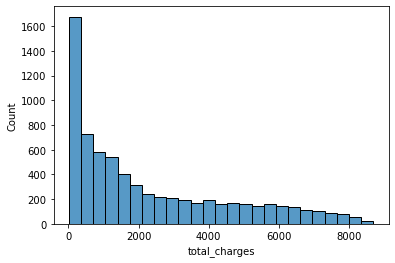

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
2548.55     1
8250.00     1
2387.75     1
6302.80     1
633.45      1
Name: total_charges, Length: 6527, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


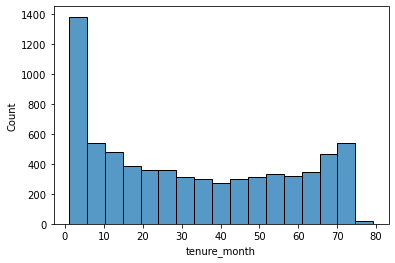

1.0     614
1.9      49
2.1      46
2.0      36
3.1      32
       ... 
74.6      1
74.7      1
75.3      1
76.5      1
75.6      1
Name: tenure_month, Length: 747, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


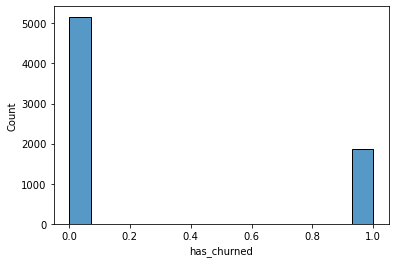

False    5164
True     1868
Name: has_churned, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


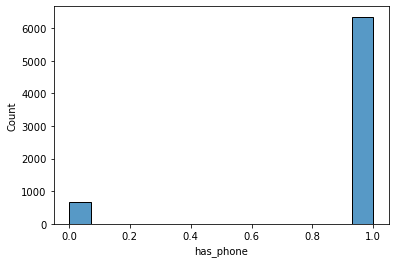

True     6352
False     680
Name: has_phone, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


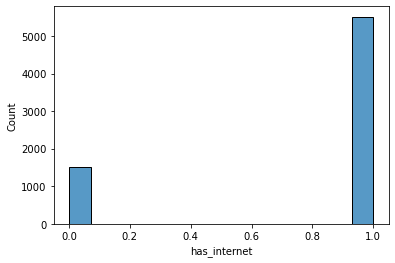

True     5510
False    1522
Name: has_internet, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


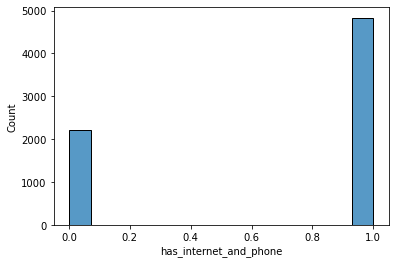

True     4830
False    2202
Name: has_internet_and_phone, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


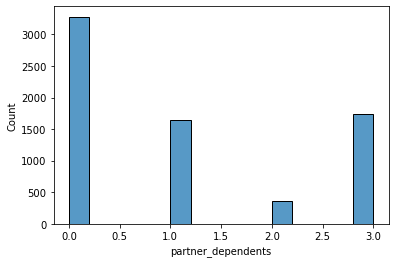

0    3278
3    1743
1    1652
2     359
Name: partner_dependents, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755) None
------------------------------------


In [47]:
#getting value_counts for only ints, floats, and bools. Plotting 

for col, vals in telco.iteritems():
    if telco[f'{col}'].dtype != object:
        print(telco[f'{col}'].value_counts(), sns.histplot(data = telco[f'{col}']), plt.show(),
              end = '\n------------------------------------\n')

#### Analysis:
Lots of redundant columns with uniterable values, will need to tidy the data and remove things such as `churn` as there is already `has_churned`. Similarly, I will convert the needed values to numeric values where possible.

### Tidying the Data
- Remove redundant columns
- Clean data where necessary
- Convert necessary dtypes to numeric values where possible while attempting to maintain readability

In [48]:
tidy_telco = telco.drop(columns = ['churn', 'customer_id' ,'has_internet_and_phone', 'partner_dependents', 'phone_type', 'internet_type', 'contract_type', 'has_phone', 'has_internet', 'start_day'])

In [49]:
conditions = [
    (telco.gender == 'Female'),
    (telco.gender == 'Male')
]
values = [0, 1]
tidy_telco['gender'] = np.select(conditions, values)
tidy_telco.head(5)

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,monthly_charges,total_charges,tenure_month,has_churned
id,,,,,,,,,,,,
0,0,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,9.0,False
1,1,0,No,No,2,1,0,Mailed check,59.9,542.40,9.1,False
2,1,0,No,No,1,2,0,Electronic check,73.9,280.85,3.8,True
3,1,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,12.6,True
4,0,1,Yes,No,1,2,0,Mailed check,83.9,267.40,3.2,True


In [50]:
conditions = [
    (telco.payment_type == 'Mailed check'),
    (telco.payment_type == 'Electronic check'),
    (telco.payment_type.str.contains('(auto)'))
]
values = [0, 1, 2]
tidy_telco['payment_type'] = np.select(conditions, values)
tidy_telco.head(20).T

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
gender,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
is_senior_citizen,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,No
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No
phone_service,1,2,1,1,1,1,1,2,1,2,0,2,1,2,0,2,0,2,1,0
internet_service,1,1,2,2,2,1,2,2,1,1,1,2,2,2,1,2,1,2,1,1
contract_int,1,0,0,0,0,0,2,2,0,2,2,2,0,2,2,2,1,0,1,0
payment_type,0,0,1,1,0,2,2,2,1,0,2,2,1,2,2,2,0,1,2,1
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,45.2,116.8,68.95,101.3,45.05,95.75,61.25,72.1,62.7,25.1
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,2460.55,8456.75,351.5,7261.25,2560.1,6849.4,1993.2,72.1,2791.5,25.1


In [51]:
conditions = [
    (telco.partner == 'No'),
    (telco.partner == 'Yes')
]
values = [0, 1]
tidy_telco['partner'] = np.select(conditions, values)
tidy_telco.head(20).T

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
gender,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
is_senior_citizen,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1
partner,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No
phone_service,1,2,1,1,1,1,1,2,1,2,0,2,1,2,0,2,0,2,1,0
internet_service,1,1,2,2,2,1,2,2,1,1,1,2,2,2,1,2,1,2,1,1
contract_int,1,0,0,0,0,0,2,2,0,2,2,2,0,2,2,2,1,0,1,0
payment_type,0,0,1,1,0,2,2,2,1,0,2,2,1,2,2,2,0,1,2,1
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,45.2,116.8,68.95,101.3,45.05,95.75,61.25,72.1,62.7,25.1
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,2460.55,8456.75,351.5,7261.25,2560.1,6849.4,1993.2,72.1,2791.5,25.1


In [52]:
conditions = [
    (telco.dependents == 'No'),
    (telco.dependents == 'Yes')
]
values = [0, 1]
tidy_telco['dependents'] = np.select(conditions, values)
tidy_telco.head(20).T

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
gender,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
is_senior_citizen,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1
partner,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0
dependents,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
phone_service,1,2,1,1,1,1,1,2,1,2,0,2,1,2,0,2,0,2,1,0
internet_service,1,1,2,2,2,1,2,2,1,1,1,2,2,2,1,2,1,2,1,1
contract_int,1,0,0,0,0,0,2,2,0,2,2,2,0,2,2,2,1,0,1,0
payment_type,0,0,1,1,0,2,2,2,1,0,2,2,1,2,2,2,0,1,2,1
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,45.2,116.8,68.95,101.3,45.05,95.75,61.25,72.1,62.7,25.1
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,2460.55,8456.75,351.5,7261.25,2560.1,6849.4,1993.2,72.1,2791.5,25.1


In [55]:
conditions = [
    (telco.has_churned == False),
    (telco.has_churned == True)
]
values = [0.0, 1.0]
tidy_telco['has_churned'] = np.select(conditions, values)
tidy_telco.head(10).T

id,0,1,2,3,4,5,6,7,8,9
gender,0.0,1.0,1.00,1.00,0.0,0.00,0.00,1.00,0.00,0.00
is_senior_citizen,0.0,0.0,0.00,1.00,1.0,0.00,1.00,0.00,1.00,0.00
partner,1.0,0.0,0.00,1.00,1.0,0.00,1.00,1.00,0.00,1.00
dependents,1.0,0.0,0.00,0.00,0.0,1.00,0.00,0.00,0.00,1.00
phone_service,1.0,2.0,1.00,1.00,1.0,1.00,1.00,2.00,1.00,2.00
internet_service,1.0,1.0,2.00,2.00,2.0,1.00,2.00,2.00,1.00,1.00
contract_int,1.0,0.0,0.00,0.00,0.0,0.00,2.00,2.00,0.00,2.00
payment_type,0.0,0.0,1.00,1.00,0.0,2.00,2.00,2.00,1.00,0.00
monthly_charges,65.6,59.9,73.90,98.00,83.9,69.40,109.70,84.65,48.20,90.45
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.80,340.35,5957.90


In [54]:
train, validate, test = train_validate_test_split(tidy_telco, target='has_churned')
train

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,monthly_charges,total_charges,tenure_month,has_churned
id,,,,,,,,,,,,
3867,1,0,0,1,2,2,0,1,91.85,257.05,2.8,1.0
5607,0,0,0,0,0,1,0,1,48.25,1293.80,26.8,0.0
6338,1,0,1,0,2,2,2,2,116.10,8310.55,71.6,0.0
1201,0,0,1,1,1,1,0,1,45.45,411.75,9.1,0.0
5591,1,0,0,0,2,1,2,2,88.55,6362.35,71.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2533,0,0,0,0,1,2,0,0,75.30,75.30,1.0,1.0
562,1,0,0,0,1,0,2,2,18.55,689.00,37.1,0.0
3747,0,1,0,0,2,2,0,1,85.55,187.45,2.2,1.0
